# Author: Midrar Adham

In [19]:
import scipy
import cv2 as cv
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Resampling:
**Select a small segment of your photo with no more than 50 pixels on each side that contains sharp features and edges.  Show the original image and the image interpolated**
---

Before getting started, here is the image that I am working with.

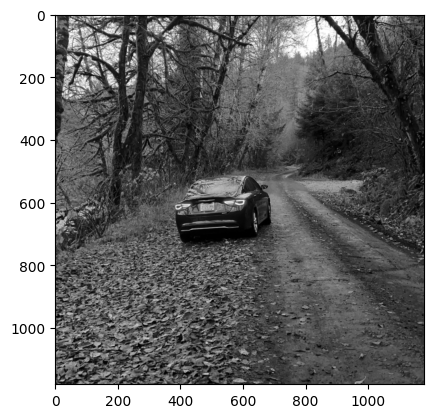

In [182]:
img = cv.imread('../../sample_data/car2.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

Text(0.5, 1.0, 'Interpolated image')

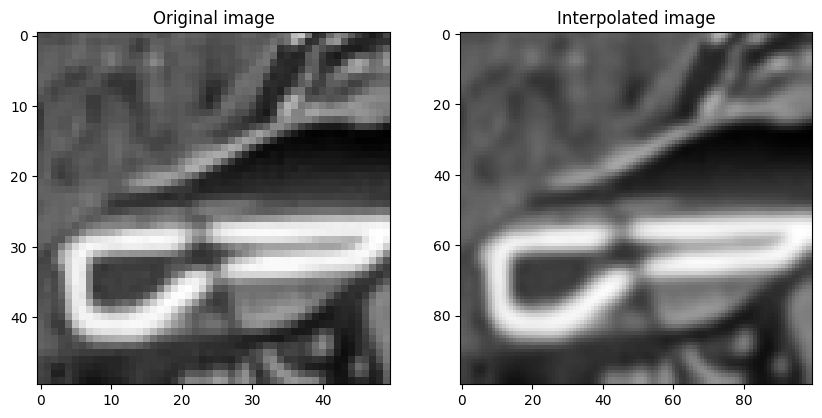

In [188]:
figure, ax = plt.subplots(1,2, figsize = (10,16))

original_img = img[580:630,380:430]
# interpolated = cv.resize(src=original_img.copy(), dsize=(img.shape[1], img.shape[0]), interpolation=cv.INTER_LINEAR)
interpolated = cv.pyrUp(src=original_img, dstsize=(2*original_img.shape[1],2*original_img.shape[0]))
ax[0].imshow(original_img, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(interpolated, cmap='gray')
ax[1].set_title('Interpolated image')


**How did the interpolation perform, in your opinion**
---

I think it smoothed the image very well. The edges details (trunk and lights) are clearly shown.

**Show the original image and the image decimated**
---

Text(0.5, 1.0, 'Decimated Image')

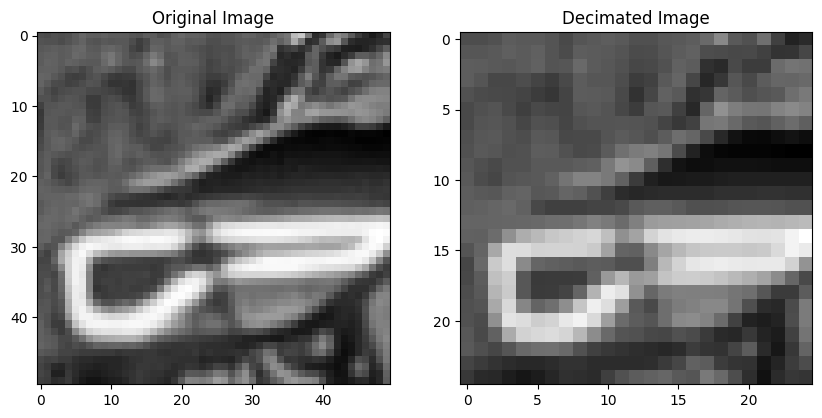

In [189]:
figure, ax = plt.subplots(1,2, figsize = (10,16))
decimated = cv.pyrDown(original_img)
ax[0].imshow(original_img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(decimated, cmap='gray')
ax[1].set_title('Decimated Image')

**How did the decimation filter perform, in your opinion?**
---

The decimation process went as expected. The decimated image is more noisy with the details (lights edges and trunk edges) disappearing

**Downsample the image by 2, upsample the resulting image by 2. Show the original image, the downsampled image, the upsampled image, and the difference between the original and upsampled image (a total of four images)**
---

Text(0.5, 1.0, 'Difference Image')

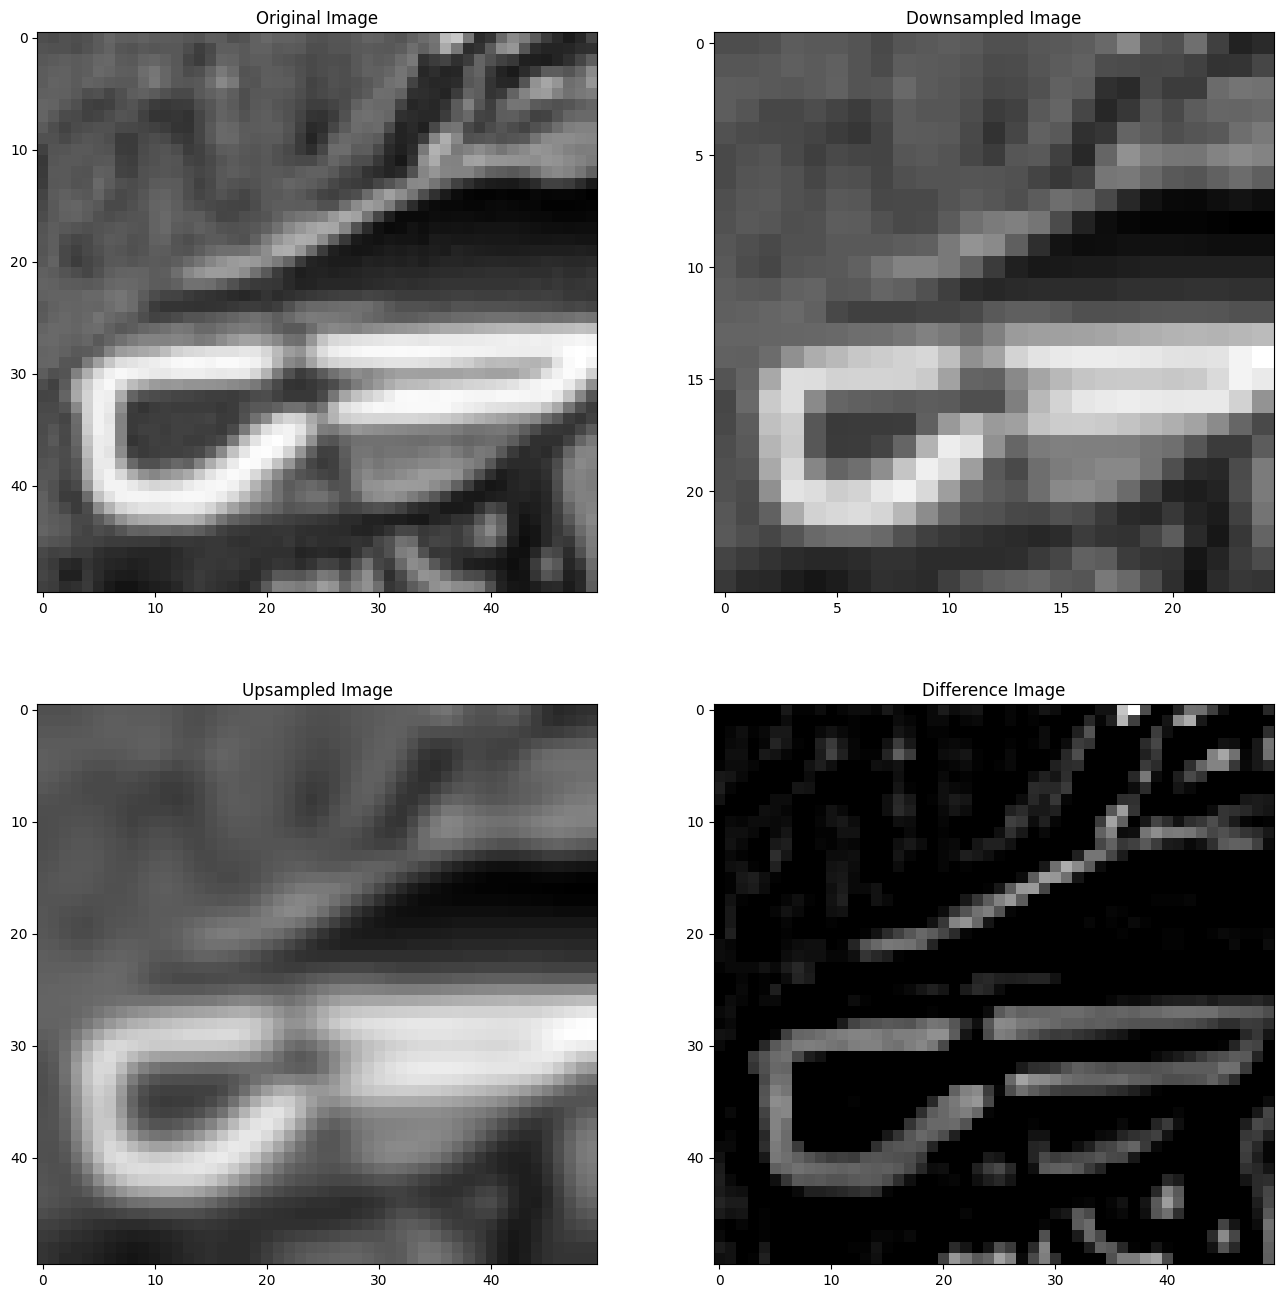

In [192]:
figure, ax = plt.subplots(2,2, figsize = (16,16))
downsampled = cv.pyrDown(original_img.copy())
upsampled = cv.pyrUp(src=downsampled, dstsize=(2*downsampled.shape[1],2*downsampled.shape[0]))
difference = cv.subtract(original_img,upsampled)
ax[0,0].imshow(original_img, cmap='gray')
ax[0,0].set_title('Original Image')
ax[0,1].imshow(downsampled, cmap='gray')
ax[0,1].set_title('Downsampled Image')
ax[1,0].imshow(upsampled, cmap='gray')
ax[1,0].set_title('Upsampled Image')
ax[1,1].imshow(difference, cmap='gray')
ax[1,1].set_title('Difference Image')


**Upsample the image by 2, downsample the resulting image by 2. Show the original image, the upsampled image, the downsampled image,  and the difference between the original and downsampled image (a total of four images).**
---

Text(0.5, 1.0, 'Difference Image')

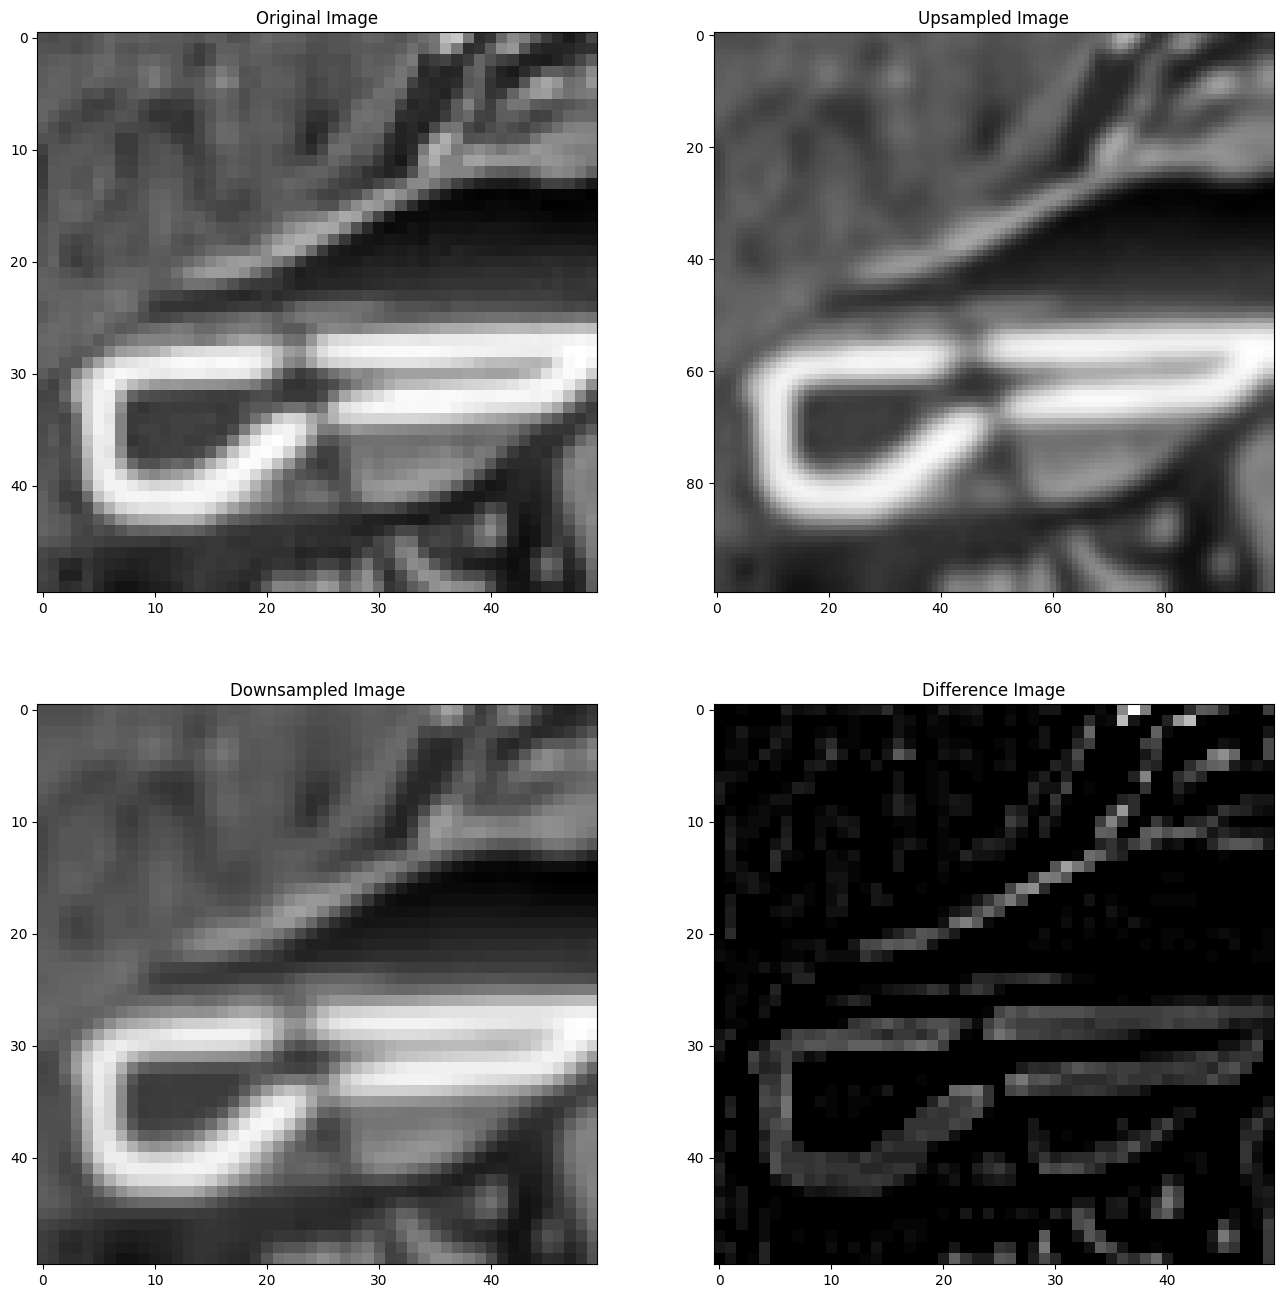

In [193]:
figure, ax = plt.subplots(2,2, figsize = (16,16))
upsampled = cv.pyrUp(src=original_img, dstsize=(2*original_img.shape[1],2*original_img.shape[0]))
downsampled = cv.pyrDown(src=upsampled,dstsize=(int(upsampled.shape[1]/2), int(upsampled.shape[0]/2)))
difference = cv.subtract(original_img,downsampled)
ax[0,0].imshow(original_img, cmap='gray')
ax[0,0].set_title('Original Image')
ax[0,1].imshow(upsampled, cmap='gray')
ax[0,1].set_title('Upsampled Image')
ax[1,0].imshow(downsampled, cmap='gray')
ax[1,0].set_title('Downsampled Image')
ax[1,1].imshow(difference, cmap='gray')
ax[1,1].set_title('Difference Image')

# Laplacian Pyramid:

**Show a four-level octave Laplacian pyramid. At each level show the original image, the downsampled image, the upsampled image, and the residual.**
---

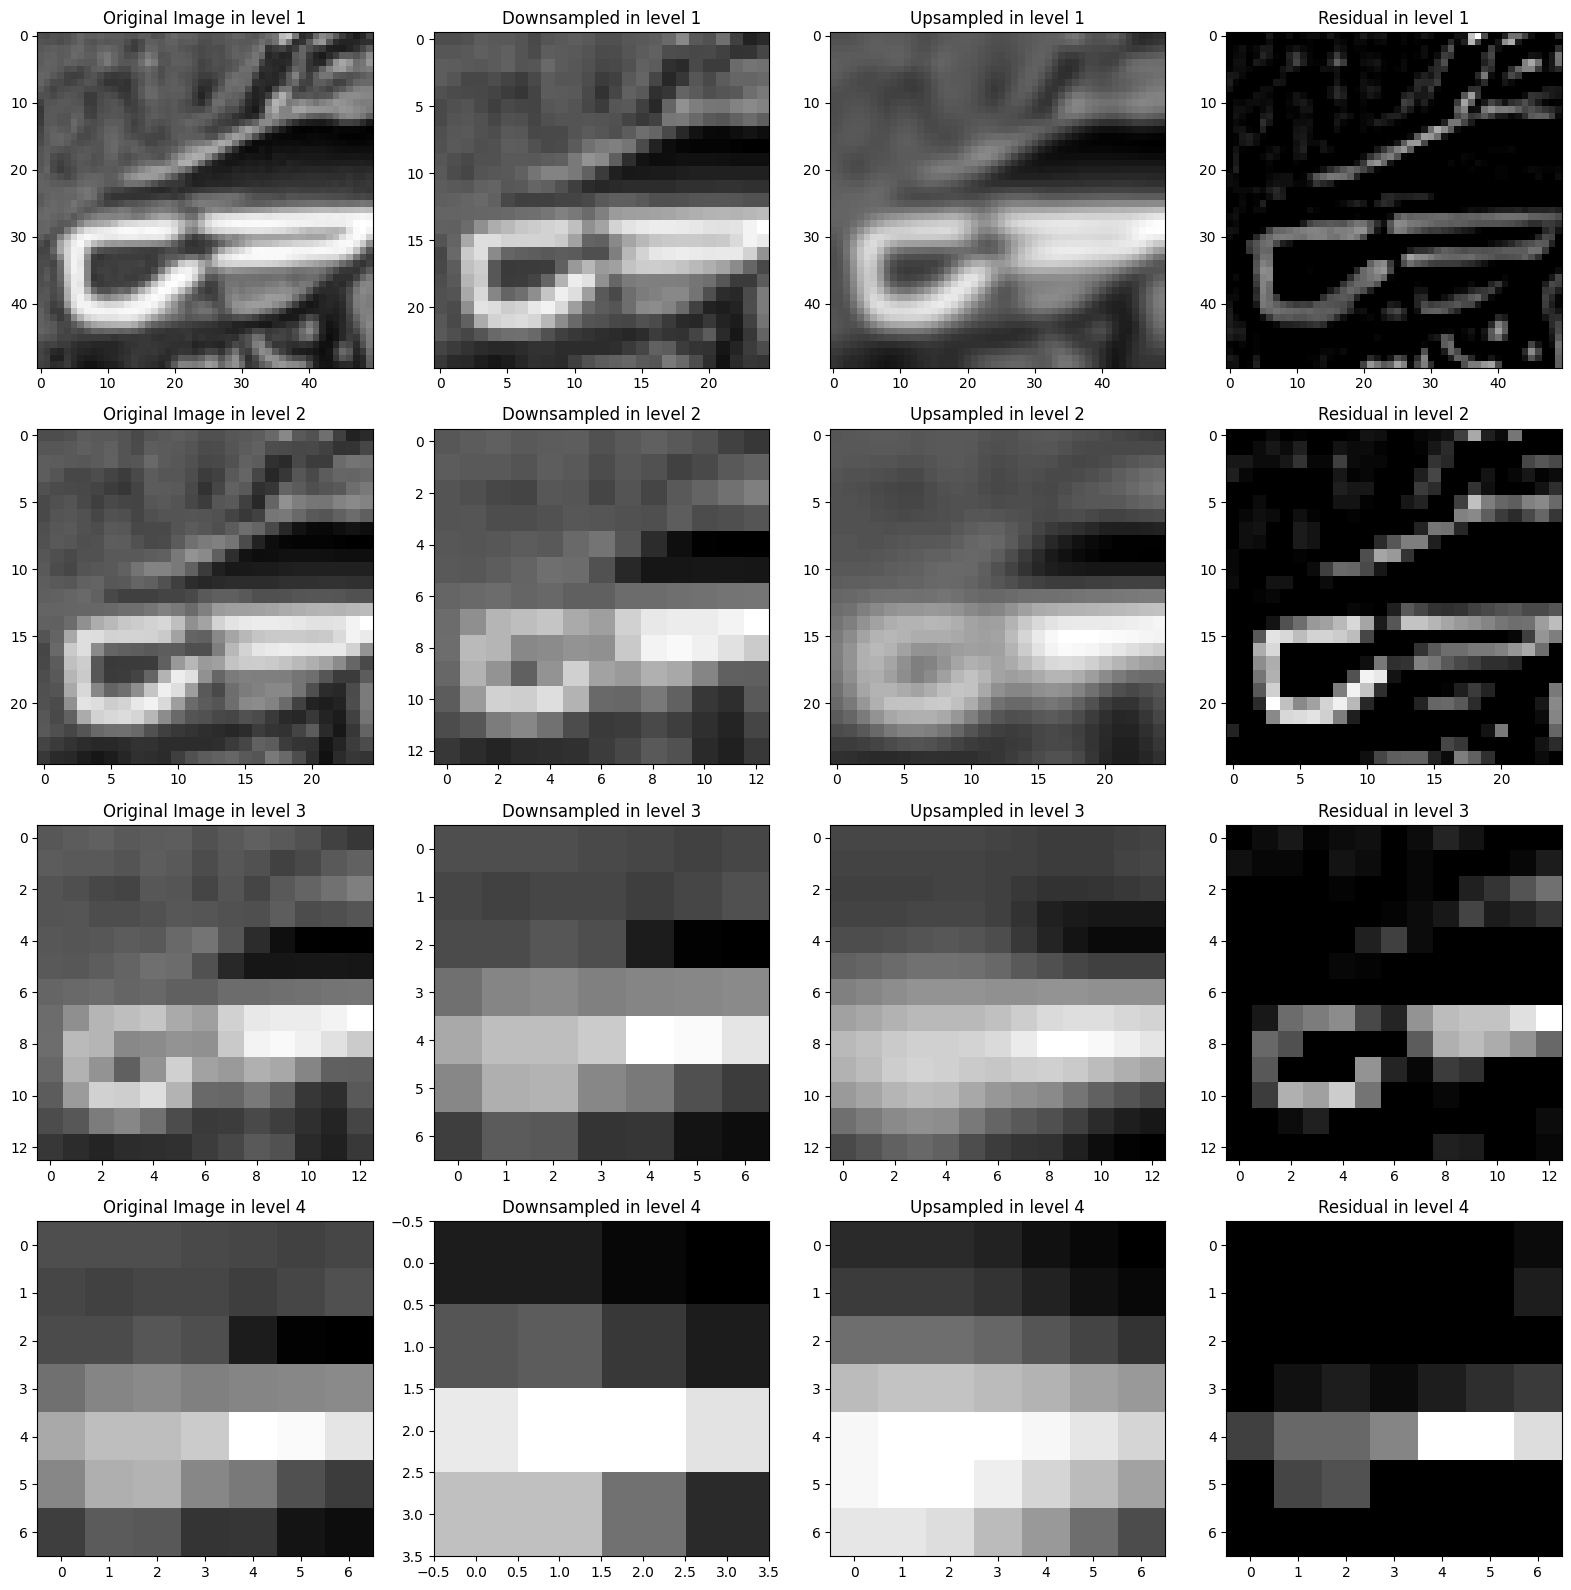

In [165]:
figure, ax = plt.subplots(4,4, figsize=(16,16))

current_img = original_img.copy()

def show_img(x,y, img, title):
    ax[x,y].imshow(img, cmap='gray')
    ax[x,y].set_title(title)

for i in range(4):
    show_img(x=i,y=0,img=current_img, title=f'Original Image in level {i+1}')
    
    downsampled = cv.pyrDown(current_img)
    show_img(x=i,y=1,img=downsampled, title=f'Downsampled in level {i+1}')
    
    upsampled = cv.pyrUp(downsampled, dstsize=(current_img.shape[1], current_img.shape[0]))
    show_img(x=i,y=2,img=upsampled, title=f'Upsampled in level {i+1}')
    
    residual = cv.subtract(current_img, upsampled)
    show_img(x=i,y=3,img=residual, title=f'Residual in level {i+1}')
    
    current_img = downsampled

plt.tight_layout()
    

**Explain how you performed the interpolation and justify your design decision**
---

For interpolation, I used ```pyrUP()``` method from OpenCV since it is nearly the same as the interpolation. Each level of the gaussian octave pyramids is created by downsampling the original image. Upsampling, which is interpolation in this case, reconstructs the decimated image, with much of the details preserved. 

**Explain how you performed the decimation and justify your design decisions**
---

For the decimation, I used ```pyrDown()``` method in OpenCV. In the first level, the original image is downsampled. The downsampled image is then used for the upsampling process. In each new level, the previously downsampled image is used as the original image. As a result, if one were to compare the downsampled and upsampled images, one would start with the upsampled image and compare it with the original image in its corresponding level. 

# Reflections

**What did you learn from this assignment?**
---

**What questions, if any, do you have for me after completing this assignment?**
---